<a href="https://colab.research.google.com/github/LeonardoSantoss944/Analise_dos_Dados_do_Airbnb-Amsterda/blob/main/Dados_Amsterd%C3%A3_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - Amsterdã**

O Airbnb já é considerado como sendo a maior empresa hoteleira da atualidade. Ah, o detalhe é que ele não possui nenhum hotel!\
Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

<p align="center"><img src="https://www.submarinoviagens.com.br/bora-nessa-trip/wp-content/uploads/2019/09/holand-al%C3%A9m-de-amsterda_767410225.jpg
", width="50%"></p>

O [Airbnb]("https://www.airbnb.com.br/") nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa. Atualmente a plataforma conta com 4 milhões de anfitriões que já receberam mais de 1 bilhão de hóspedes em mais de 220 países.

Como uma de suas iniciativas o Airbnb disponibiliza dados do seu site sobre algumas cidades do mundo. Os dados podem ser acessados através do site [Inside Airbnb]("http://insideairbnb.com/get-the-data.html"), onde podemos baixar uma grande quantidade de dados e usar para as mais diversas análises e soluções.


<p align="center"><img src="https://nomadesdigitais.com/wp-content/uploads/2014/07/Amsterdam1.jpg
", width="50%"></p>


Amsterdã é a capital da Holanda, conhecida por seu patrimônio artístico, um elaborado sistema de canais e casas estreitas com telhados de duas águas, legados da era dourada do século XVII na cidade. O bairro de museus abriga o Museu Van Gogh, o Rijksmuseum, com obras de Rembrandt e Vermeer, e o Stedelijk, que privilegia a arte moderna. O ciclismo é uma característica essencial da cidade, que tem grande quantidade de ciclovias


**Neste notebook serão analisados os dados da cidade de Amsterdã na Holanda**

## Obtenção dos Dados

Os dados usados neste projetos foram obtidos a partir do site [Inside Arbnb]("http://insideairbnb.com/get-the-data.html").

Para a análise iremos utilizar apenas um arquivo com uma versão reduzida dos dados.

* *listing.csv* - 	Summary information and metrics for listings in Amsterdam (good for visualisations).

In [ ]:
# Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importando o arquivo listing.csv para um DataFFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-11-04/visualisations/listings.csv")


## Análise dos Dados

Aqui vamos visualizar e entender como estão estruturados para assim extrair informações úteis.

**Dicionário de variáveis**

* **id** - número de id gerado para identificar o imóvel;
* **name** - nome da propriedade anunciada;
* **host_id** - número de id do proprietário (anfitrião) da propriedade;
* **host_name** - nome do anfitrião;
* **neighbourhood_group** - esta coluna não contém nenhum valor válido;
* **neighbourhood** - nome do bairro;
* **latitude** - coordenada de latitude da propriedade;
* **longitude** -  coordenada de longitude da propriedade;
* **room_type** - tipo de quarto oferecido;
* **price** - preço para alugar o imóvel;
* **minimum_nights** - quantidade mínima de noites para reservar;
* **number_of_reviews** - número de avaliações que a propriedade possui;
* **last_review** - data da última avaliação;
* **reviews_per_month** - quantidade de visualizações por mês;
* **calculated_host_listings_count** - quantidade de imóveis da mesma pessoa;
* **availability_365** - número de dias disponíveis a cada 365.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,282,2019-11-21,2.83,1,33,4,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.57,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,226,2021-10-20,2.13,1,22,7,0363 974D 4986 7411 88D8
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,364,2021-10-15,4.62,2,267,28,0363 607B EA74 0BD8 2F6F
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,55,2,509,2021-10-09,5.52,2,282,30,0363 607B EA74 0BD8 2F6F


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas e ver os tipos das colunas do conjunto de dados.



In [ ]:
# Identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 5402
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no dataset?**

A quantidade de dados ausentes é determinante na qualidade dos dados do dataset. Por isso é importante saber o quão significantes são os valores nulos se comparados as entradas

* é possivel notar que as colunas *review_per_month* e *last_review* possuem mais de 8% de seus dados faltantes;
* A coluna *neighbourhood* possui 100% de seus dados faltantes;



In [ ]:
# verificando  as porcentagens de dados ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.086635
last_review                       0.086635
license                           0.006664
host_name                         0.000185
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

Colunas com baixo poder preditivo e grande quantidade de dados faltantes podem ser excluídas.

**Vamos excluír as colunas com dados faltantes e com baixo valor preditivo que não terão relevância para o projeto em questão.**\
Aqui iremos apagar as variáveis `neighbourhood_group`, `review_per_month`, `last_review`, `license`, `host_name`.


In [ ]:
# excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group', 'reviews_per_month', 'last_review', 'license', 'host_name'], inplace=True)

In [ ]:
# Verificando novamente a quantidade de dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

number_of_reviews_ltm             0
availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
host_id                           0
name                              0
id                                0
dtype: int64

## **Q3. Qual o tipo de distribuição das variáveis?**

Uma das melhoires formas de visualizar como as variáveis estão distribuídas é com a plotagem de um histograma. 

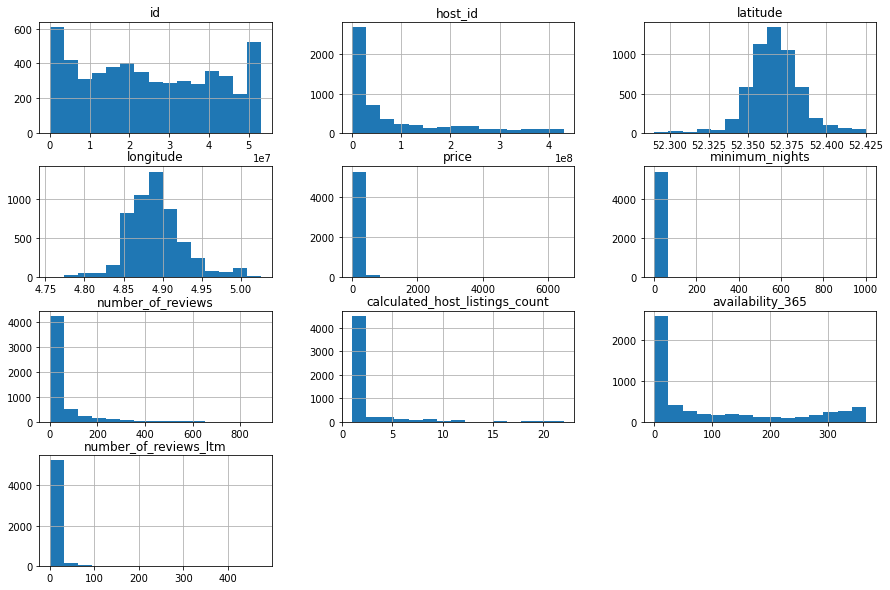

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## **Q4. Há outliers presentes?**

Podemos notar que alguns gráficos não seguem uma distribuição, que é um forte indicio de *outlier*, para confirmar a presença de outliers, temos duas formas de fazer isso rapidamente, são elas:

* Resumo estatístico, através do método *describe()*
* Plotagem de *boxplot* para a variável.

In [ ]:
# verificando a distribuição estatística
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.402000e+03,5.402000e+03,5402.000000,5402.000000,5402.000000,5402.00000,5402.000000,5402.000000,5402.000000,5402.000000
mean,2.514490e+07,8.717240e+07,52.367058,4.891532,169.002777,3.80174,49.400407,2.188078,101.988338,5.214180
std,1.635076e+07,1.133920e+08,0.016975,0.036314,163.856758,24.49360,88.637090,3.160899,126.425968,15.547749
min,2.818000e+03,3.159000e+03,52.290340,4.755710,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
25%,1.104046e+07,8.820505e+06,52.356630,4.869590,100.000000,2.00000,5.000000,1.000000,0.000000,0.000000
50%,2.367064e+07,2.972255e+07,52.366595,4.888670,140.000000,2.00000,17.000000,1.000000,32.000000,1.000000
75%,3.983068e+07,1.292072e+08,52.376540,4.908607,200.000000,3.00000,49.000000,2.000000,197.000000,5.000000
max,5.314008e+07,4.301123e+08,52.425120,5.026430,6477.000000,1001.00000,889.000000,22.000000,365.000000,475.000000


Após verificar a distribuição estatística, podemos notar que alguns dados não condizem com a realidade, são eles:

* A variável `price` tem valor mínimo 0;
* A variável `price` tem  um Q3 em 200, mas tem um valor máximo de 6477 euros, isso é um indicio claro da presença de *outliers*.
* A variável `minimum_nights` (Quantidade mínima de noites) apresenta um valor máximo de 1001 noites, algo muito superior aos 365 dias de um ano.


## Limpando os Outliers

Como a análise estatística já foi feita para tratar os outliers serão plotados boxplots e calculados os limites utilizando a regra do IQR score.

O IQR é calculado subtraindo o Terceiro Quartil(75%) pelo Primeiro Quartil(25%).

Para o tratamento dos outliers vamos seguir os seguintes passos:

* Definir Q1 e Q3 das variáveis a serem limpas;
* Calcular o IQR das variáveis;
* Definir os limites: superior e inferior para cortar os outliers;
* Remover os outliers

In [ ]:
# Identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  100.0
Limite superior de price:  350.0
Limite inferior de price:  -50.0


Aqui podemos ver que apesar de não existirem outliers na parte inferior, temos valores iguais a zero que precisam ser tratados.

Iremos plotar um boxplot para visualizar a limpeza feita. O zero não é considerado um outlier inferior, mas é um dado que não condiz com a realidade e por isso precisa ser excluído.

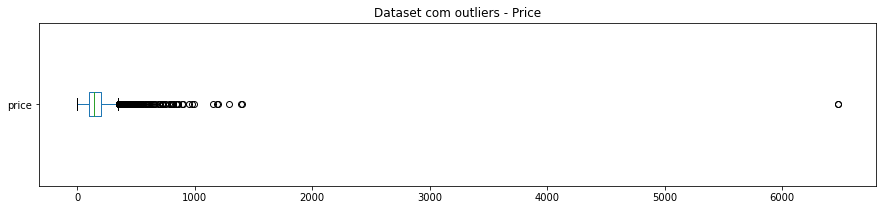

O dataset possui 5402 colunas
257 Entradas acima de 350.0
Representam 4.76% do dataset


In [ ]:
# Verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset com outliers - Price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 350.0".format(len(df[df.price > 350.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 350.0]) / df.shape[0])*100))

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nights:  4.5
Limite inferior de minimum_nights:  0.5


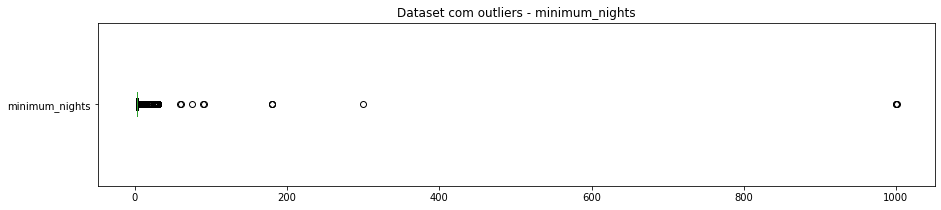

O dataset possui 5402 colunas
721 Entradas acima de 350.0
Representam 13.35% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset com outliers - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 350.0".format(len(df[df.minimum_nights > 4.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 4.5]) / df.shape[0])*100))

Agora vamos eliminar os outliers dos nossos dados, além dos dados com valor 0.
Para isso criamos uma cópia do nosso dataset original chamada: `df_clean`, o que assegura um ponto de retorno caso seja necessário verificar algo no conjunto original antes da limpeza.

In [ ]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 350.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 4.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (5402, 13)
Shape após a limpeza:  (4450, 13)


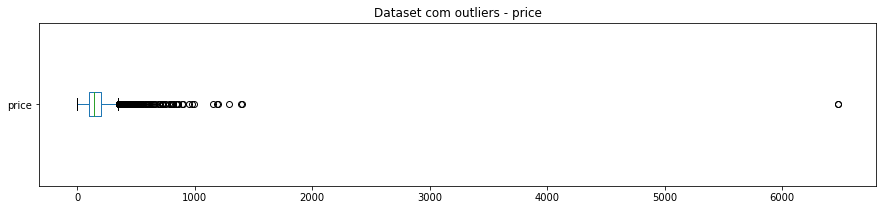

O dataset possui 5402 colunas
257 Entradas acima de 350.0
Representam 4.76% do dataset


In [ ]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset com outliers - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 350.0".format(len(df[df.price > 350.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 350.0]) / df.shape[0])*100))

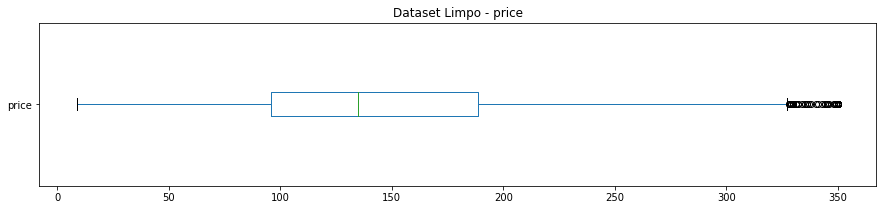

Tamanho original: 5402 colunas
Tamanho atual: 4450 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Agora que a limpeza foi feita podemos observar que o boxplot nos mostra  alguns dados como outliers, mas estes dados estão relacionados ao novo dataset e a limpeza levou em consideração os quartís do conjunto de dados originais.

**Vamos verificar novamente o histograma com as distribuições das variáveis numéricas e o resume estatístico.**

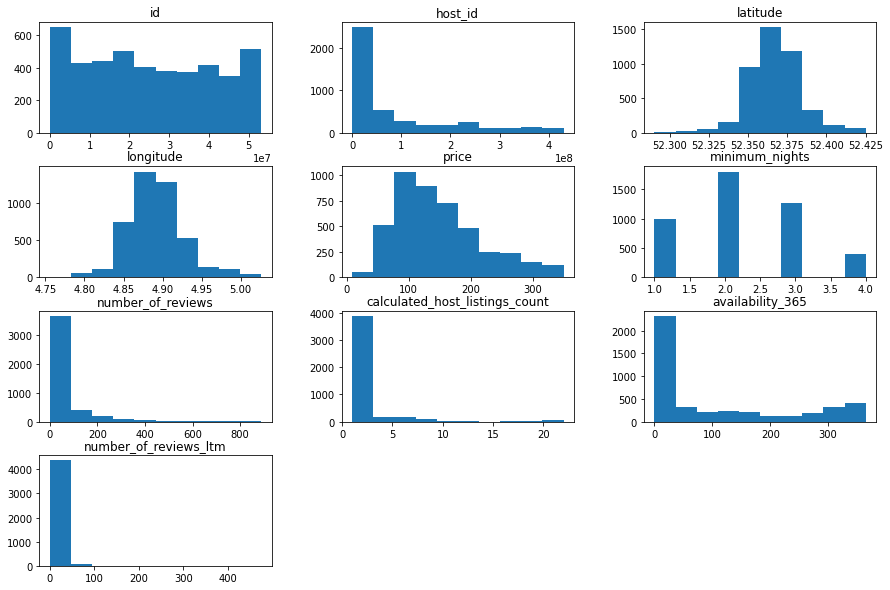

In [ ]:
# verificando as distribuições
df_clean.hist(figsize=(15,10), grid=False);

In [ ]:
# Resumo estatístico após a limpeza dos dados
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.450000e+03,4.450000e+03,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000
mean,2.518384e+07,9.001471e+07,52.367174,4.891537,148.269438,2.237978,55.103820,2.175506,102.617528,5.946292
std,1.620377e+07,1.144425e+08,0.017191,0.036336,68.846871,0.898412,94.500668,3.128259,126.943349,16.878662
min,2.818000e+03,3.159000e+03,52.290340,4.755710,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.136115e+07,9.487706e+06,52.356683,4.869193,96.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,2.375814e+07,3.225683e+07,52.366895,4.888987,135.000000,2.000000,20.000000,1.000000,31.000000,1.000000
75%,3.968043e+07,1.374071e+08,52.376638,4.908715,188.750000,3.000000,55.000000,2.000000,200.000000,5.000000
max,5.314008e+07,4.301123e+08,52.425120,5.026430,350.000000,4.000000,889.000000,22.000000,365.000000,475.000000


* Notamos que a variáveis `price ` e `minimum_nights` condizem com a realidade e agora podem nos ajudar a fazer uma análise mais detalhada dos dados e insights que podemos obter.
* Também podemos observar a sutil mudança na  da variável `price`, mostrando como é um atributo robusto e confiável.

## **Q4. Qual a média dos preços de aluguel?**

A média dos valores dos alugueis é de 148 euros.

In [ ]:
# Média de preços dos aluguéis
df_clean.price.mean()

148.2694382022472

## **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. Nesse caso, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.129636,-0.246530,-0.055916,-0.005366
minimum_nights,0.129636,1.000000,-0.131059,-0.305177,-0.265459
number_of_reviews,-0.246530,-0.131059,1.000000,-0.044519,0.231884
calculated_host_listings_count,-0.055916,-0.305177,-0.044519,1.000000,0.254511
availability_365,-0.005366,-0.265459,0.231884,0.254511,1.000000


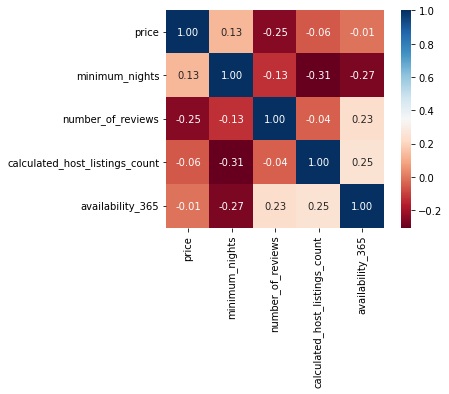

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
# criar uma matriz de correlação
corr_1 = df[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr_1)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.009594,-0.136287,0.007591,0.075066
minimum_nights,-0.009594,1.000000,-0.012624,-0.018157,-0.016130
number_of_reviews,-0.136287,-0.012624,1.000000,-0.041617,0.216325
calculated_host_listings_count,0.007591,-0.018157,-0.041617,1.000000,0.255450
availability_365,0.075066,-0.016130,0.216325,0.255450,1.000000


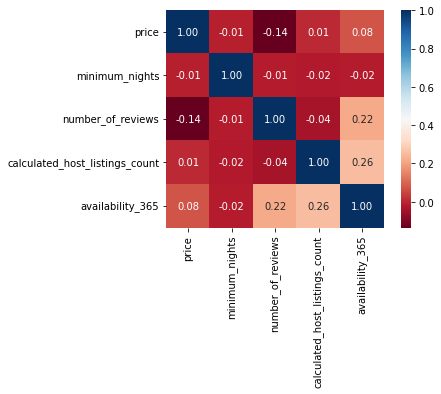

In [ ]:
sns.heatmap(corr_1, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Podemos observar que **não houve nenhuma relação linear expressiva das variáveis com a coluna** `price`, pois nenhuma coluna está muito longe do zero. Mas podemos observar que os valores variam antes e depois do tratamento de outliers.

* Vemos que a correlação linear entre `price` e `minimum_nights` antes e depois do tratamento d eoutliers é bastante expressiva. Com os outliers presentes a **correlação linear** foi de (-0.01) quase nula, mas para os dados tratados a correlação subiu para (0.13)

* Podemos observar que no caso em que os dados foram tratados tivemos uma **correlação linear positiva.**

## **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Acessando o aplicativo ou o site do Airbnb você poderá notar que são disponibilizadas várias opções para aluguel: **apartamentos/ casas inteiras, Quarto compartilhado, Quarto privativo.**

Aqui vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2720
Private room       1634
Hotel room           78
Shared room          18
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.611236
Private room       0.367191
Hotel room         0.017528
Shared room        0.004045
Name: room_type, dtype: float64

## **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
De Pijp - Rivierenbuurt                   161.910913
Centrum-Oost                              160.022680
Zuid                                      156.328520
Centrum-West                              156.218705
Westerpark                                153.760518
IJburg - Zeeburgereiland                  152.198347
De Baarsjes - Oud-West                    151.792366
Watergraafsmeer                           149.587719
Oud-Oost                                  145.234375
Oostelijk Havengebied - Indische Buurt    137.551724
Name: price, dtype: float64

O bairro **De Pijp - Rivierenbuurt** aparece como o bairro com a maior média de valor do aluguel, sendo de 161 euros.

É um bairro moderno com cafés charmosos, bares subterrâneos e uma boa quantidade de arte de rua. O Albert Cuypmarkt é imperdível, é um mercado diário de comida com lojas descoladas e ótima comida de rua. Você pode encontrar roupas peculiares, comida de rua, bem como frutas e vegetais frescos. De Pijp está repleto de cafés, restaurantes, cafés e bares fantásticos. O Pijp é perfeito para quem quer morar em um bairro movimentado e com localização central.

Vamos ver a quantidade de imóveis nesse bairro para garantir que o preço mpédio não esteja sendo enviesado.

In [ ]:
# ver quantidade de imóveis para De Pijp - Rivierenbuurt 

print(df_clean[df_clean.neighbourhood == "De Pijp - Rivierenbuurt"].shape)

# ver as entradas para Near South Side

df_clean[df_clean.neighbourhood == "De Pijp - Rivierenbuurt"]

(449, 13)


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
10,55621,"Fully equiped house, PIJP area = great",262846,De Pijp - Rivierenbuurt,52.353990,4.897560,Entire home/apt,222,3,32,1,0,0
19,91535,"Privat room and shared Houseboat ""Ramona"" centre",494281,De Pijp - Rivierenbuurt,52.357740,4.896470,Private room,115,1,45,1,54,1
23,137026,Entire house with garden in De Pijp,670266,De Pijp - Rivierenbuurt,52.351780,4.906990,Entire home/apt,200,3,97,1,90,0
40,255809,stylish apartment free car parking and 2 bikes,1344947,De Pijp - Rivierenbuurt,52.344160,4.887090,Private room,135,2,100,1,319,10
56,327285,beautiful designed ap.+bikes+garden,1672823,De Pijp - Rivierenbuurt,52.356250,4.893230,Private room,148,3,535,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,52785666,Fully equipped apartment in de Amsterdamse Pijp,427335130,De Pijp - Rivierenbuurt,52.349520,4.888550,Entire home/apt,108,3,0,1,96,0
5348,52827266,Lovely apartment with sunny balcony in the Pijp,17861243,De Pijp - Rivierenbuurt,52.351850,4.896630,Entire home/apt,149,3,0,1,43,0
5361,52877343,Atmospheric apartment in Rivierenbuurt,38006487,De Pijp - Rivierenbuurt,52.342890,4.901610,Entire home/apt,150,3,0,1,292,0
5375,52964536,"Clean, bright and central apartment in vivid a...",16177681,De Pijp - Rivierenbuurt,52.353010,4.898720,Entire home/apt,143,1,0,1,41,0


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

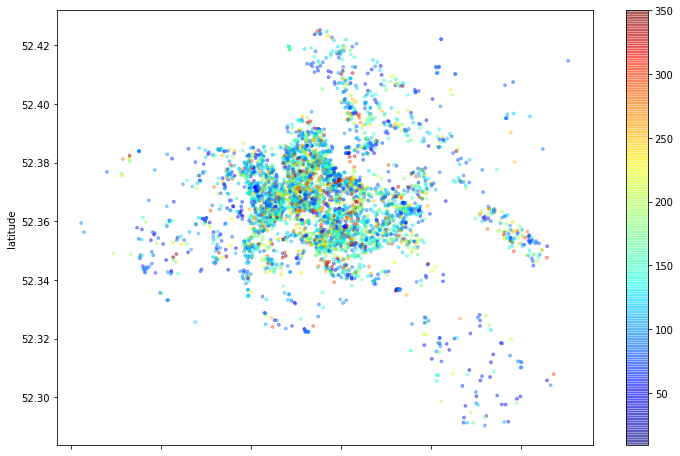

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna minimum_nights
df_clean[['minimum_nights']].mean()

minimum_nights    2.237978
dtype: float64

**A média do mínimo de noites para aluguel é de 2 noites.**

## **Conclusões**

Aqui foi feita apenas uma análise superficial dos dados do Airbnb, mas notamos a presença de outliers em algumas variáveis do dataset e com um tratamento pudemos extrair insights interessantes como:

* Mais de 60% dos imóveis disponíveis são casas ou apartamentos inteiros.
* Há uma baixa ou nula correlação entre as variáveis.
* A maioria das acomodações exige uma estadia mínima de 2 dias
* Os alugueis tem um valor médio de ¢148,26.

Recomenda-see que seja usado em uma futura análise exploratória mais detalhada o conjunto com os dados completos com 74 atributos disponíveis, mas para quem deseja visitar Amsterdã no futuro a versão resumida já da uma visão inicial.